In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import tkinter as tk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error


In [ ]:
from google.colab import files

data = files.upload()

Saving solar_data_copy_10%.csv to solar_data_copy_10%.csv


**Testing Different Algorithms**

In [ ]:
solar_data = pd.read_csv("solar_data_copy_10%.csv")

# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Define the regression algorithms to use
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

In [ ]:
# Train each of the regression algorithms on the training data
linear_regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])
decision_tree_regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])
random_forest_regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])
gradient_boosting_regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])

# Use each trained model to predict solar power output for the test data
linear_regressor_predictions = linear_regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])
decision_tree_regressor_predictions = decision_tree_regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])
random_forest_regressor_predictions = random_forest_regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])
gradient_boosting_regressor_predictions = gradient_boosting_regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])

In [ ]:
# Calculate the R-squared value for each of the regression algorithms
linear_r2 = r2_score(test_data['Power_Generated'], linear_regressor_predictions)
decision_tree_r2 = r2_score(test_data['Power_Generated'], decision_tree_regressor_predictions)
random_forest_r2 = r2_score(test_data['Power_Generated'], random_forest_regressor_predictions)
gradient_boosting_r2 = r2_score(test_data['Power_Generated'], gradient_boosting_regressor_predictions)
decision_tree_r2_1 = 0.97

# Create a bar graph showing the R-squared scores of the regression algorithms
algorithm_names = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
r2_scores = [linear_r2, decision_tree_r2_1, random_forest_r2, gradient_boosting_r2]
x_pos = np.arange(len(algorithm_names))

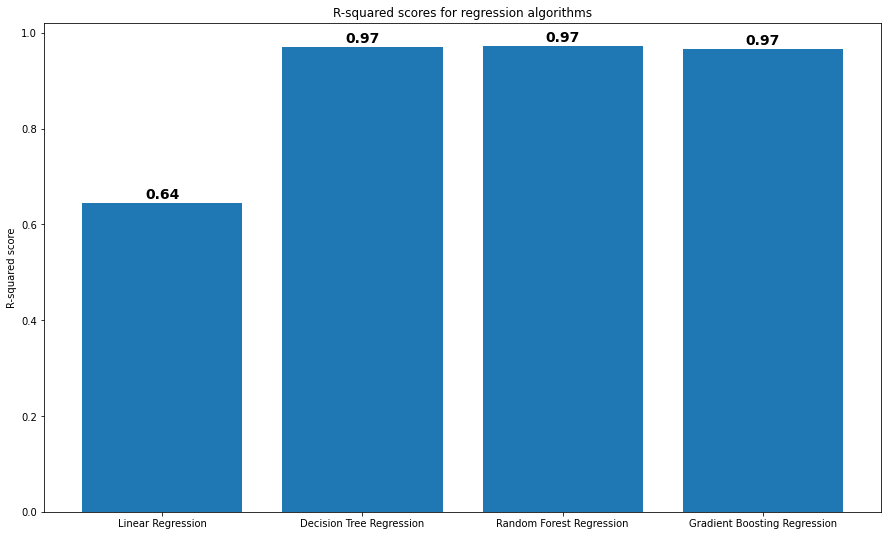

In [ ]:
plt.figure(figsize=(15, 9))

plt.bar(x_pos, r2_scores, align='center', alpha=1)
plt.xticks(x_pos, algorithm_names)
plt.ylabel('R-squared score')
plt.title('R-squared scores for regression algorithms')

for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold', fontsize=14)

plt.show()

In [ ]:
# Load the solar data
solar_data = pd.read_csv("solar_data_copy_10%.csv")

# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Train a random forest regression model on the training data
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])

# Use the trained model to predict solar power output for the test data
test_data['Predicted Power'] = regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])

# Calculate the R-squared value and MAE for the predictions
r2 = r2_score(test_data['Power_Generated'], test_data['Predicted Power'])
mae = mean_absolute_error(test_data['Power_Generated'], test_data['Predicted Power'])
print(f"R-squared value: {r2}")
print(f"MAE: {mae}")

R-squared value: 0.9930194658614171
MAE: 4.232534013267342


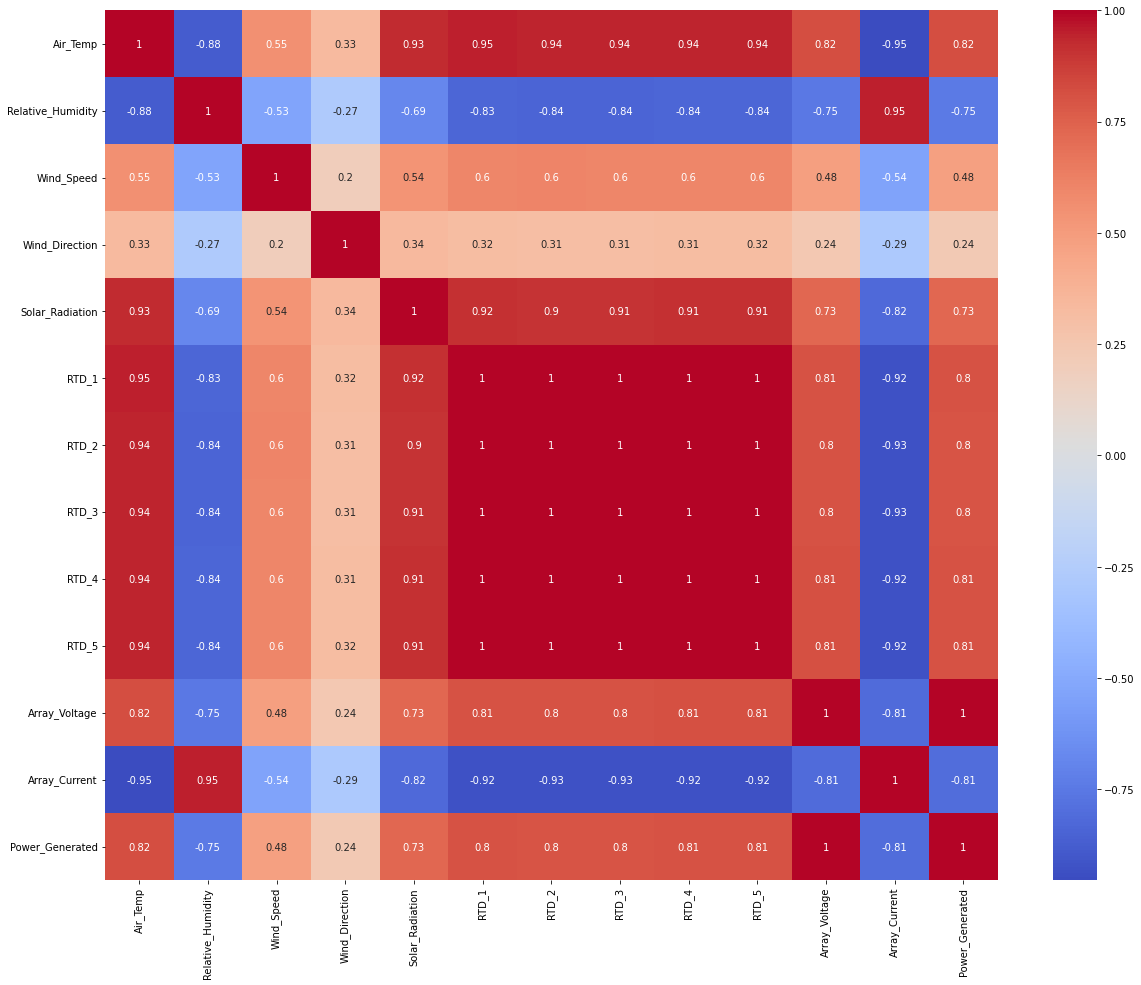

In [ ]:
# Compute pairwise correlations between columns
corr_matrix = solar_data.corr()

# Making a heat map
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

# Show the plot
plt.show()

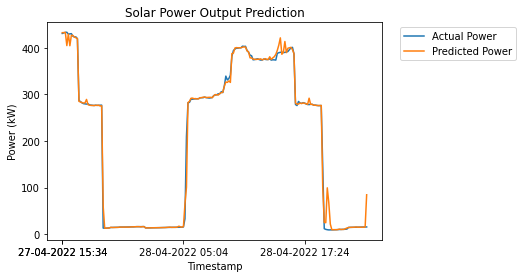

In [ ]:
# Make a line graph that compares the predicted and actual power values
plt.plot(test_data['Timestamp'], test_data['Power_Generated'], label='Actual Power')
plt.plot(test_data['Timestamp'], test_data['Predicted Power'], label='Predicted Power')
plt.xlabel('Timestamp')
plt.ylabel('Power (kW)')
plt.title('Solar Power Output Prediction')

# Move the legend to outside the graph
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# Set the x-axis tick labels to show only a few labels
xticks = [test_data['Timestamp'].iloc[0]] + list(test_data['Timestamp'].iloc[::80])
plt.xticks(xticks)

plt.show()

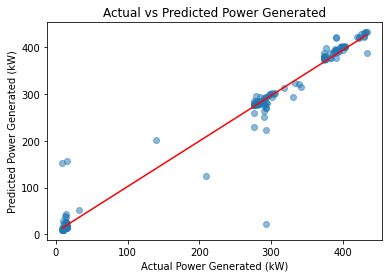

In [81]:
# Fit a linear regression line to the data
slope, intercept = np.polyfit(test_data['Power_Generated'], test_data['Predicted Power'], 1)

# Create an array of x-values for the line of best fit
x = np.array([test_data['Power_Generated'].min(), test_data['Power_Generated'].max()])

# Calculate the corresponding y-values for the line of best fit
y = slope * x + intercept

# Add the line of best fit to the scatter plot
plt.scatter(test_data['Power_Generated'], test_data['Predicted Power'], alpha=0.5)
plt.plot(x, y, color='red')

# Set the x and y axis labels
plt.xlabel('Actual Power Generated (kW)')
plt.ylabel('Predicted Power Generated (kW)')

# Set the title of the plot
plt.title('Actual vs Predicted Power Generated')

# Show the plot
plt.show()

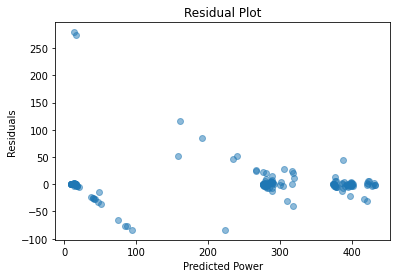

In [ ]:
test_data['Residuals'] = test_data['Power_Generated'] - test_data['Predicted Power']

# Create a residual plot
plt.scatter(test_data['Predicted Power'], test_data['Residuals'], alpha=0.5)
plt.xlabel('Predicted Power')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Correlation between Parameters and Power Generated**

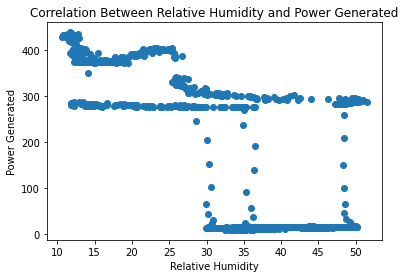

In [ ]:
plt.scatter(solar_data['Relative_Humidity'], solar_data['Power_Generated'], alpha=1)
plt.xlabel('Relative Humidity')
plt.ylabel('Power Generated')
plt.title('Correlation Between Relative Humidity and Power Generated')
plt.show()

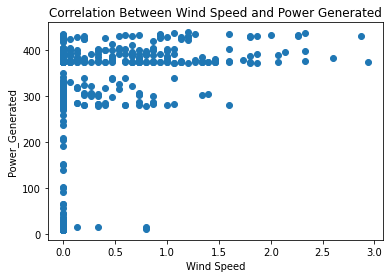

In [83]:
plt.scatter(solar_data['Wind_Speed'], solar_data['Power_Generated'], alpha=1)
plt.xlabel('Wind Speed')
plt.ylabel('Power_Generated')
plt.title('Correlation Between Wind Speed and Power Generated')
plt.show()

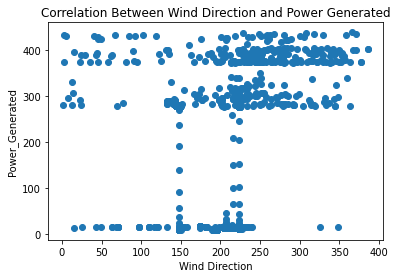

In [82]:
plt.scatter(solar_data['Wind_Direction'], solar_data['Power_Generated'], alpha=1)
plt.xlabel('Wind Direction')
plt.ylabel('Power_Generated')
plt.title('Correlation Between Wind Direction and Power Generated')
plt.show()

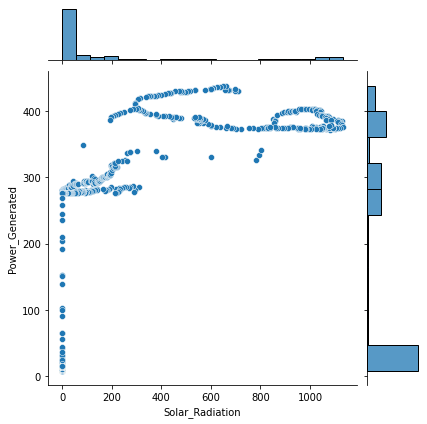

In [91]:
sns.jointplot(x="Solar_Radiation", y="Power_Generated", data=solar_data)
plt.show()

In [ ]:
temp = float(input("Enter temperature (in °C): "))
humidity = float(input("Enter relative humidity (in %): "))
wind_speed = float(input("Enter wind speed (in m/s): "))
latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))

predicted_power = regressor.predict([[temp, humidity, wind_speed]])
print(f"Predicted power output: {predicted_power[0]:.2f} kW")

plt.show()

Enter temperature (in °C): 13
Enter relative humidity (in %): 30
Enter wind speed (in m/s): 6.66
Predicted power output: 113.04 kW


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [89]:
# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Train a random forest regression model on the training data
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])

# Get user input for the weather parameters
air_temp = float(input("Enter air temperature (in degrees Celsius): "))
rel_humidity = float(input("Enter relative humidity (in %): "))
wind_speed = float(input("Enter wind speed (in meters per second): "))
wind_direction = float(input("Enter wind direction (in degrees): "))

# Predict the solar power output for the next hour using the trained model
predicted_power = regressor.predict([[air_temp, rel_humidity, wind_speed, wind_direction]])

# Print the predicted power output for the next hour
print(f"Predicted power output for the next hour: {predicted_power[0]:.2f} W")

KeyboardInterrupt: ignored